In [1]:
# Oasis Infobyte Data Science Internship
# April - P2 Batch
# Task 4 - EMAIL SPAM DETECTION WITH MACHINE LEARNING


In [2]:
# Importing the Required Libraries
# Numpy Library for Numerical Calculations
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib and for Plottings
import matplotlib.pyplot as plt

# Pickle Library for Saving the Model
import pickle

# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords')  # Downloading the Stopwords

# import Seaborn for plotting

# Decision Tree Classifier, Random Forest Classifier and Multinomial Naïve Bayes are Models

# PorterStemmer for Stemming the Words

# Accuracy Score and Confusion Matrix is for Analysis of Models

# CountVectorizer for Bagging of Words and Vectorizing it

# Stopwords for removing stopwords in the Text

# Train_Test_Split for splitting the Dataset

[nltk_data] Downloading package stopwords to C:\Users\Sangram
[nltk_data]     Bhise\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Using ISO-8859-1 codec for encoding the email file
data = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [4]:
# Extracting information from dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Checking for null values in Dataset
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
data.tail()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
# Taking only the required Columns from the Dataset i.e. label and message
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Dimensions of the Dataset
data.shape

(5572, 2)

In [10]:
# Checking for the types of emails in the Dataset
data.groupby('label').size()

label
ham     4825
spam     747
dtype: int64

<AxesSubplot:>

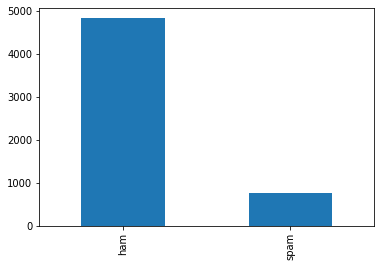

In [11]:
# Plotting
data['label'].value_counts().plot(kind='bar')

In [12]:
# Natural Language Processiing
# Preprocessing the Text in the Dataset
porter_stemmer = PorterStemmer()
list1 = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['message'][i])
    review = review.lower()
    review = review.split()
    review = [porter_stemmer.stem(
        word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    list1.append(review)

# Printing the first 5 values in the list
list1[1:6]

['ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv']

In [13]:
# Creating Bag of Words Model
count_vectorizer = CountVectorizer(max_features=4000)
X = count_vectorizer.fit_transform(list1).toarray()
Y = pd.get_dummies(data['label'])
Y = Y.iloc[:, 1].values

In [14]:
# Data Modeling
# Splitting the Dataset into Training and Testing Set
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

In [15]:
# Building a Model
# Creating the Models

# Model 1 - Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# Model 3 - Multinomial Naïve Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

In [16]:
# Prediction
prediction1 = model1.predict(X_test)
prediction2 = model2.predict(X_test)
prediction3 = model3.predict(X_test)

In [17]:
# Testing the Model

# Model 1 - Random Forest Classifier
print("Random Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, prediction1))
print("Accuracy: ", accuracy_score(Y_test, prediction1))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, prediction2))
print("Accuracy: ", accuracy_score(Y_test, prediction2))
print("--------------------------------")

# Model 3 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, prediction3))
print("Accuracy: ", accuracy_score(Y_test, prediction3))


Random Forest Classifier
Confusion Matrix: 
[[965   0]
 [ 27 123]]
Accuracy:  0.9757847533632287
--------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[957   8]
 [ 22 128]]
Accuracy:  0.9730941704035875
--------------------------------
Multinomial Naïve Bayes
Confusion Matrix: 
[[955  10]
 [ 10 140]]
Accuracy:  0.9820627802690582


<AxesSubplot:>

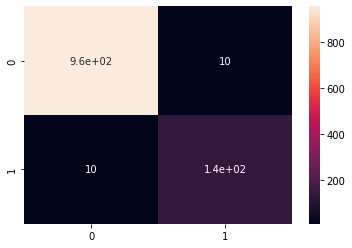

In [18]:
# Plotting COnfusion Matrix
confusionmatrix = confusion_matrix(Y_test, prediction3)
sns.heatmap(confusionmatrix, annot=True)


In [19]:
# Classification Reports of each Classifier
report1 = classification_report(Y_test, prediction1)
print("Classification Report for RFC \n", report1)
report2 = classification_report(Y_test, prediction2)
print("Classification Report for DTC \n", report2)
report3 = classification_report(Y_test, prediction3)
print("Classification Report for MNB \n", report3)


Classification Report for RFC 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

Classification Report for DTC 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.94      0.85      0.90       150

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report for MNB 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.9

In [20]:
# Therefore according to the classification report, the Best Model is Multinomial Naïve Bayes.